# LIBRARIES

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
from google.colab import drive
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

In [ ]:
drive.mount('/content/drive')
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# LOAD DATASET

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Summer 2024/Machine Learning/OBJECTIVE CODE/DATASET/House Prices - A.R.T/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Summer 2024/Machine Learning/OBJECTIVE CODE/DATASET/House Prices - A.R.T/test.csv')

In [ ]:
print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


In [ ]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df_train.columns = df_train.columns.str.lower()
df_test.columns = df_test.columns.str.lower()

In [ ]:
df_train.drop(['id'], axis = 1, inplace = True)

In [ ]:
print(df_train.shape)
print(df_test.shape)

(1460, 80)
(1459, 80)


# DATA CLEANING

In [ ]:
des = pd.DataFrame(df_train.describe().transpose())

In [ ]:
len(des[des['min'] == 0])

23

In [ ]:
info = pd.DataFrame(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mssubclass     1460 non-null   int64  
 1   mszoning       1460 non-null   object 
 2   lotfrontage    1201 non-null   float64
 3   lotarea        1460 non-null   int64  
 4   street         1460 non-null   object 
 5   alley          91 non-null     object 
 6   lotshape       1460 non-null   object 
 7   landcontour    1460 non-null   object 
 8   utilities      1460 non-null   object 
 9   lotconfig      1460 non-null   object 
 10  landslope      1460 non-null   object 
 11  neighborhood   1460 non-null   object 
 12  condition1     1460 non-null   object 
 13  condition2     1460 non-null   object 
 14  bldgtype       1460 non-null   object 
 15  housestyle     1460 non-null   object 
 16  overallqual    1460 non-null   int64  
 17  overallcond    1460 non-null   int64  
 18  yearbuil

In [ ]:
df_train.isnull().sum().sort_values(ascending=False).head(25)

poolqc          1453
miscfeature     1406
alley           1369
fence           1179
masvnrtype       872
fireplacequ      690
lotfrontage      259
garageyrblt       81
garagecond        81
garagetype        81
garagefinish      81
garagequal        81
bsmtexposure      38
bsmtfintype2      38
bsmtcond          37
bsmtqual          37
bsmtfintype1      37
masvnrarea         8
electrical         1
mssubclass         0
fireplaces         0
functional         0
kitchenqual        0
kitchenabvgr       0
bedroomabvgr       0
dtype: int64

In [ ]:
df_test.isnull().sum().sort_values(ascending=False).head(20)

poolqc          1456
miscfeature     1408
alley           1352
fence           1169
masvnrtype       894
fireplacequ      730
lotfrontage      227
garageyrblt       78
garagequal        78
garagefinish      78
garagecond        78
garagetype        76
bsmtcond          45
bsmtqual          44
bsmtexposure      44
bsmtfintype1      42
bsmtfintype2      42
masvnrarea        15
mszoning           4
bsmthalfbath       2
dtype: int64

In [ ]:
drop_cols = df_train.isnull().sum().sort_values(ascending=False).head(25)[:6].index

In [ ]:
drop_cols = drop_cols.tolist()
drop_cols

['poolqc', 'miscfeature', 'alley', 'fence', 'masvnrtype', 'fireplacequ']

In [ ]:
df_train.drop(drop_cols, axis = 1, inplace = True)
df_test.drop(drop_cols, axis = 1, inplace = True)

In [ ]:
print(df_train.shape)
print(df_test.shape)

(1460, 74)
(1459, 74)


In [ ]:
df_train.isnull().sum().sort_values(ascending=False).head(13)

lotfrontage     259
garageyrblt      81
garagecond       81
garagetype       81
garagefinish     81
garagequal       81
bsmtfintype2     38
bsmtexposure     38
bsmtqual         37
bsmtfintype1     37
bsmtcond         37
masvnrarea        8
electrical        1
dtype: int64

In [ ]:
df_test.isnull().sum().sort_values(ascending=False).head(13)

lotfrontage     227
garageyrblt      78
garagefinish     78
garagequal       78
garagecond       78
garagetype       76
bsmtcond         45
bsmtqual         44
bsmtexposure     44
bsmtfintype1     42
bsmtfintype2     42
masvnrarea       15
mszoning          4
dtype: int64

In [ ]:
df_train_null_row = df_train[df_train.isna().any(axis=1)]
df_train_clean = df_train.dropna(axis=0)

In [ ]:
print(df_train_clean.shape)
print(df_train_null_row.shape)

(1094, 74)
(366, 74)


In [ ]:
i = 0
for col in df_train_clean.columns:
  if len(df_train_clean[col].unique()) <= 25:
    i += 1
    print(f'{col} == > {df_train_clean[col].unique()}')

print(i)

mssubclass == > [ 60  20  70  50 190  45 120  30  90  80 160  75 180  40  85]
mszoning == > ['RL' 'RM' 'C (all)' 'FV' 'RH']
street == > ['Pave' 'Grvl']
lotshape == > ['Reg' 'IR1' 'IR2' 'IR3']
landcontour == > ['Lvl' 'Bnk' 'Low' 'HLS']
utilities == > ['AllPub']
lotconfig == > ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
landslope == > ['Gtl' 'Mod' 'Sev']
neighborhood == > ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'OldTown'
 'BrkSide' 'Sawyer' 'NridgHt' 'SawyerW' 'NAmes' 'IDOTRR' 'MeadowV'
 'Timber' 'StoneBr' 'ClearCr' 'Gilbert' 'Edwards' 'NWAmes' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
condition1 == > ['Norm' 'Feedr' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosN' 'PosA' 'RRNe']
condition2 == > ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA']
bldgtype == > ['1Fam' '2fmCon' 'TwnhsE' 'Duplex' 'Twnhs']
housestyle == > ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SLvl' '2.5Unf' '2.5Fin' 'SFoyer']
overallqual == > [ 7  6  8  5  9  4 10  3  2]
overallcond == > [5 8 6 7 4 3 9 2]
roofstyle

In [ ]:
label_encoded_columns = []
for col in df_train_clean.columns:
  if len(df_train_clean[col].unique()) <= 25:
    label_encoded_columns.append(col)

print(label_encoded_columns)

['mssubclass', 'mszoning', 'street', 'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle', 'overallqual', 'overallcond', 'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'exterqual', 'extercond', 'foundation', 'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2', 'heating', 'heatingqc', 'centralair', 'electrical', 'lowqualfinsf', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual', 'totrmsabvgrd', 'functional', 'fireplaces', 'garagetype', 'garagefinish', 'garagecars', 'garagequal', 'garagecond', 'paveddrive', '3ssnporch', 'poolarea', 'miscval', 'mosold', 'yrsold', 'saletype', 'salecondition']


In [ ]:
len(label_encoded_columns)

55

In [ ]:

le = LabelEncoder()

In [ ]:
for col in label_encoded_columns:
  df_train_clean[col] = le.fit_transform(df_train_clean[col])
  df_test[col] = le.fit_transform(df_test[col])

In [ ]:
i = 0
for col in df_train.columns:
  if len(df_train_clean[col].unique()) <= 25:
    i += 1
    print(f'{col} == > {df_train_clean[col].unique()}')

print(i)

mssubclass == > [ 5  0  6  4 14  3 11  1 10  8 12  7 13  2  9]
mszoning == > [3 4 0 1 2]
street == > [1 0]
lotshape == > [3 0 1 2]
landcontour == > [3 0 2 1]
utilities == > [0]
lotconfig == > [4 2 0 1 3]
landslope == > [0 1 2]
neighborhood == > [ 5 24  6 15 11 21 17  3 19 16 20 12  9 10 23 22  4  8  7 14 13  0  2 18
  1]
condition1 == > [2 1 0 5 8 6 4 3 7]
condition2 == > [2 0 5 1 4 3]
bldgtype == > [0 1 4 2 3]
housestyle == > [5 2 0 1 7 4 3 6]
overallqual == > [5 4 6 3 7 2 8 1 0]
overallcond == > [3 6 4 5 2 1 7 0]
roofstyle == > [1 3 2 4 0]
roofmatl == > [1 6 2 5 4 3 0]
exterior1st == > [11  7 12  2  5 13  4 10  8  0  1  9  6  3]
exterior2nd == > [13  8 15  6 14 10  5  3 12  0  2  7  1  9 11  4]
exterqual == > [2 3 0 1]
extercond == > [3 1 2 0]
foundation == > [2 1 0 4 3]
bsmtqual == > [2 3 0 1]
bsmtcond == > [3 1 0 2]
bsmtexposure == > [3 1 2 0]
bsmtfintype1 == > [2 0 5 4 3 1]
bsmtfintype2 == > [5 4 1 2 3 0]
heating == > [0 1 2 3]
heatingqc == > [0 2 4 1 3]
centralair == > [1 0]
elec

In [ ]:
df_train_label = pd.concat([df_train_clean, df_train_null_row], axis=0)
df_train_label.reset_index(drop=True, inplace=True)
print(df_train_label.shape)


(1460, 74)


In [ ]:
df_train_label.isnull().sum().sort_values(ascending = False).head()

lotfrontage     259
garageyrblt      81
garagecond       81
garagetype       81
garagefinish     81
dtype: int64

In [ ]:
df_test.shape

(1459, 74)

In [ ]:
df_train_label[df_train_label['saleprice'] >= 550000]

,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,...,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,saleprice
332,0,3,105.0,15431,1,3,3,0,4,0,...,0,0,170,0,0,3,3,8,4,555000
522,5,3,104.0,21535,1,0,3,0,0,0,...,0,0,0,0,0,0,1,8,4,755000
609,5,3,107.0,13891,1,3,3,0,4,0,...,0,0,192,0,0,0,3,6,5,582933
683,0,3,100.0,12919,1,0,3,0,4,0,...,0,0,0,0,0,2,4,6,5,611657
782,5,3,85.0,16056,1,0,3,0,4,0,...,0,0,0,0,0,6,0,6,5,556581
877,5,3,118.0,35760,1,0,3,0,1,0,...,0,0,0,0,0,6,0,8,4,625000
886,5,3,160.0,15623,1,0,3,0,0,0,...,0,0,0,4,0,6,1,8,0,745000


In [ ]:
df_train_label.drop(df_train_label[df_train_label['saleprice'] >= 550000].index, axis = 0, inplace = True)

In [ ]:
df_train_label = df_train_clean.interpolate(method='linear')  # Forward fill NaN values
df_test_label = df_test.interpolate(method='linear')   # Backward fill NaN values


In [ ]:
print(df_train_label.isnull().sum().any())
print(df_test_label.isnull().sum().any())

False
False


In [ ]:
print(df_train_label.shape)
print(df_test_label.shape)

(1094, 74)
(1459, 74)


# DATA PREPROCESSING

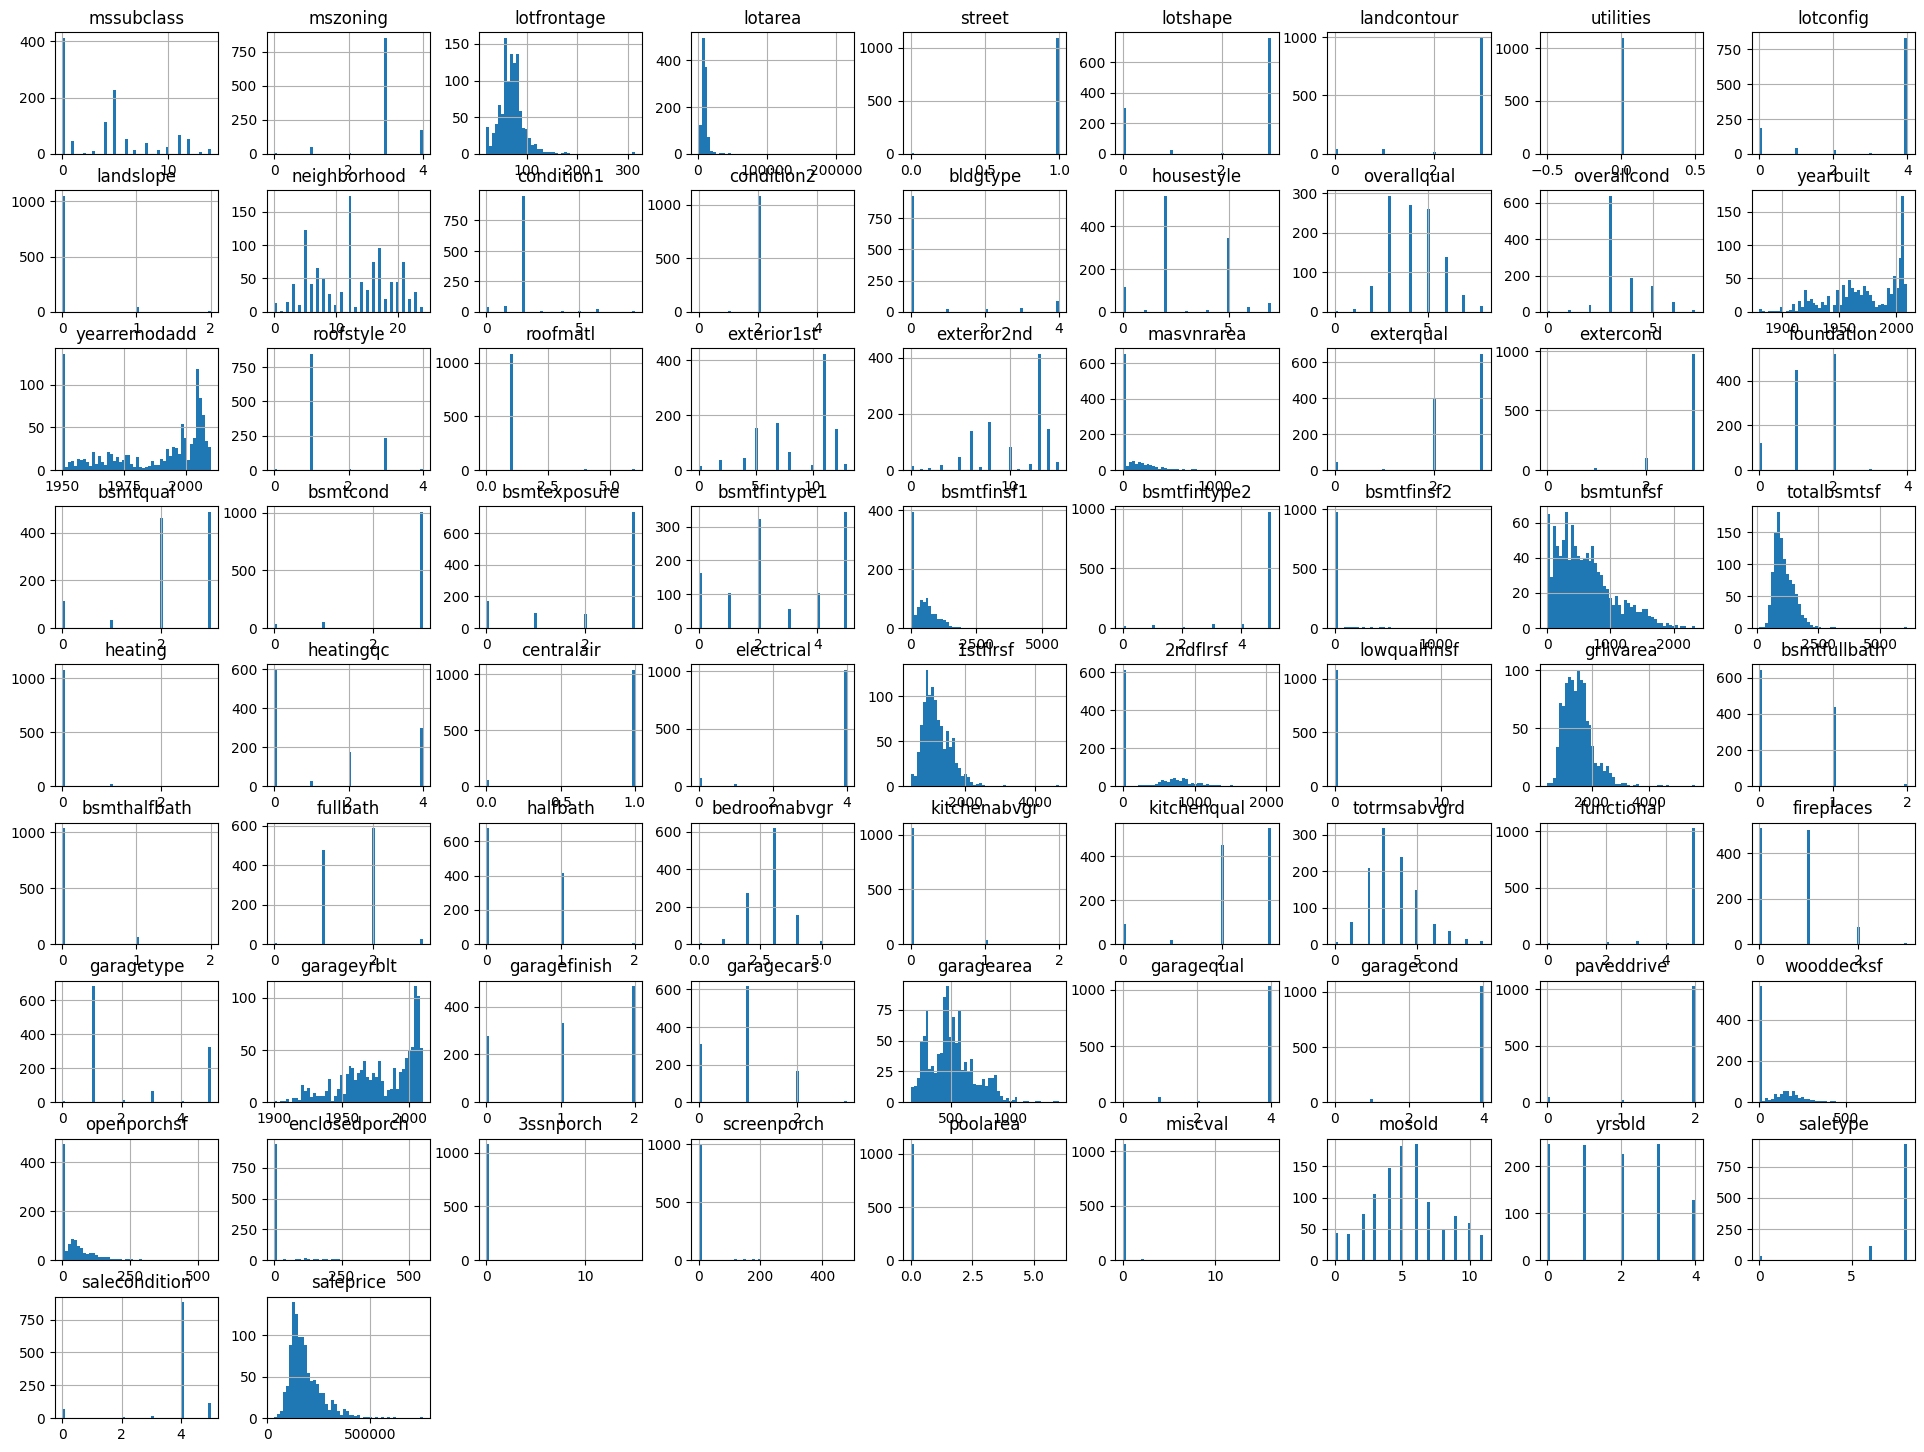

In [ ]:
df_train_label.hist(figsize = (24,18), bins = 50)
plt.show()

In [ ]:
df_train_label.columns

Index(['mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street',
       'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope',
       'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle',
       'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd', 'roofstyle',
       'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrarea', 'exterqual',
       'extercond', 'foundation', 'bsmtqual', 'bsmtcond', 'bsmtexposure',
       'bsmtfintype1', 'bsmtfinsf1', 'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf',
       'totalbsmtsf', 'heating', 'heatingqc', 'centralair', 'electrical',
       '1stflrsf', '2ndflrsf', 'lowqualfinsf', 'grlivarea', 'bsmtfullbath',
       'bsmthalfbath', 'fullbath', 'halfbath', 'bedroomabvgr', 'kitchenabvgr',
       'kitchenqual', 'totrmsabvgrd', 'functional', 'fireplaces', 'garagetype',
       'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal',
       'garagecond', 'paveddrive', 'wooddecksf', 'openporchsf',
       'enclosedpor

In [ ]:
transform_list = ['lotarea','openporchsf','wooddecksf','masvnrarea']
for col in transform_list:
  print(f'{col} ==> {np.min(df_train_label[col])}')

lotarea ==> 1300
openporchsf ==> 0
wooddecksf ==> 0
masvnrarea ==> 0.0


In [ ]:
# for col in transform_list:
#   if np.min(df_train_label[col]) == 0:
#     df_train_label[col] = df_train_label[col] + 0.0001

In [ ]:
# for col in transform_list:
#   df_train_label[col] = np.log(df_train_label[col])

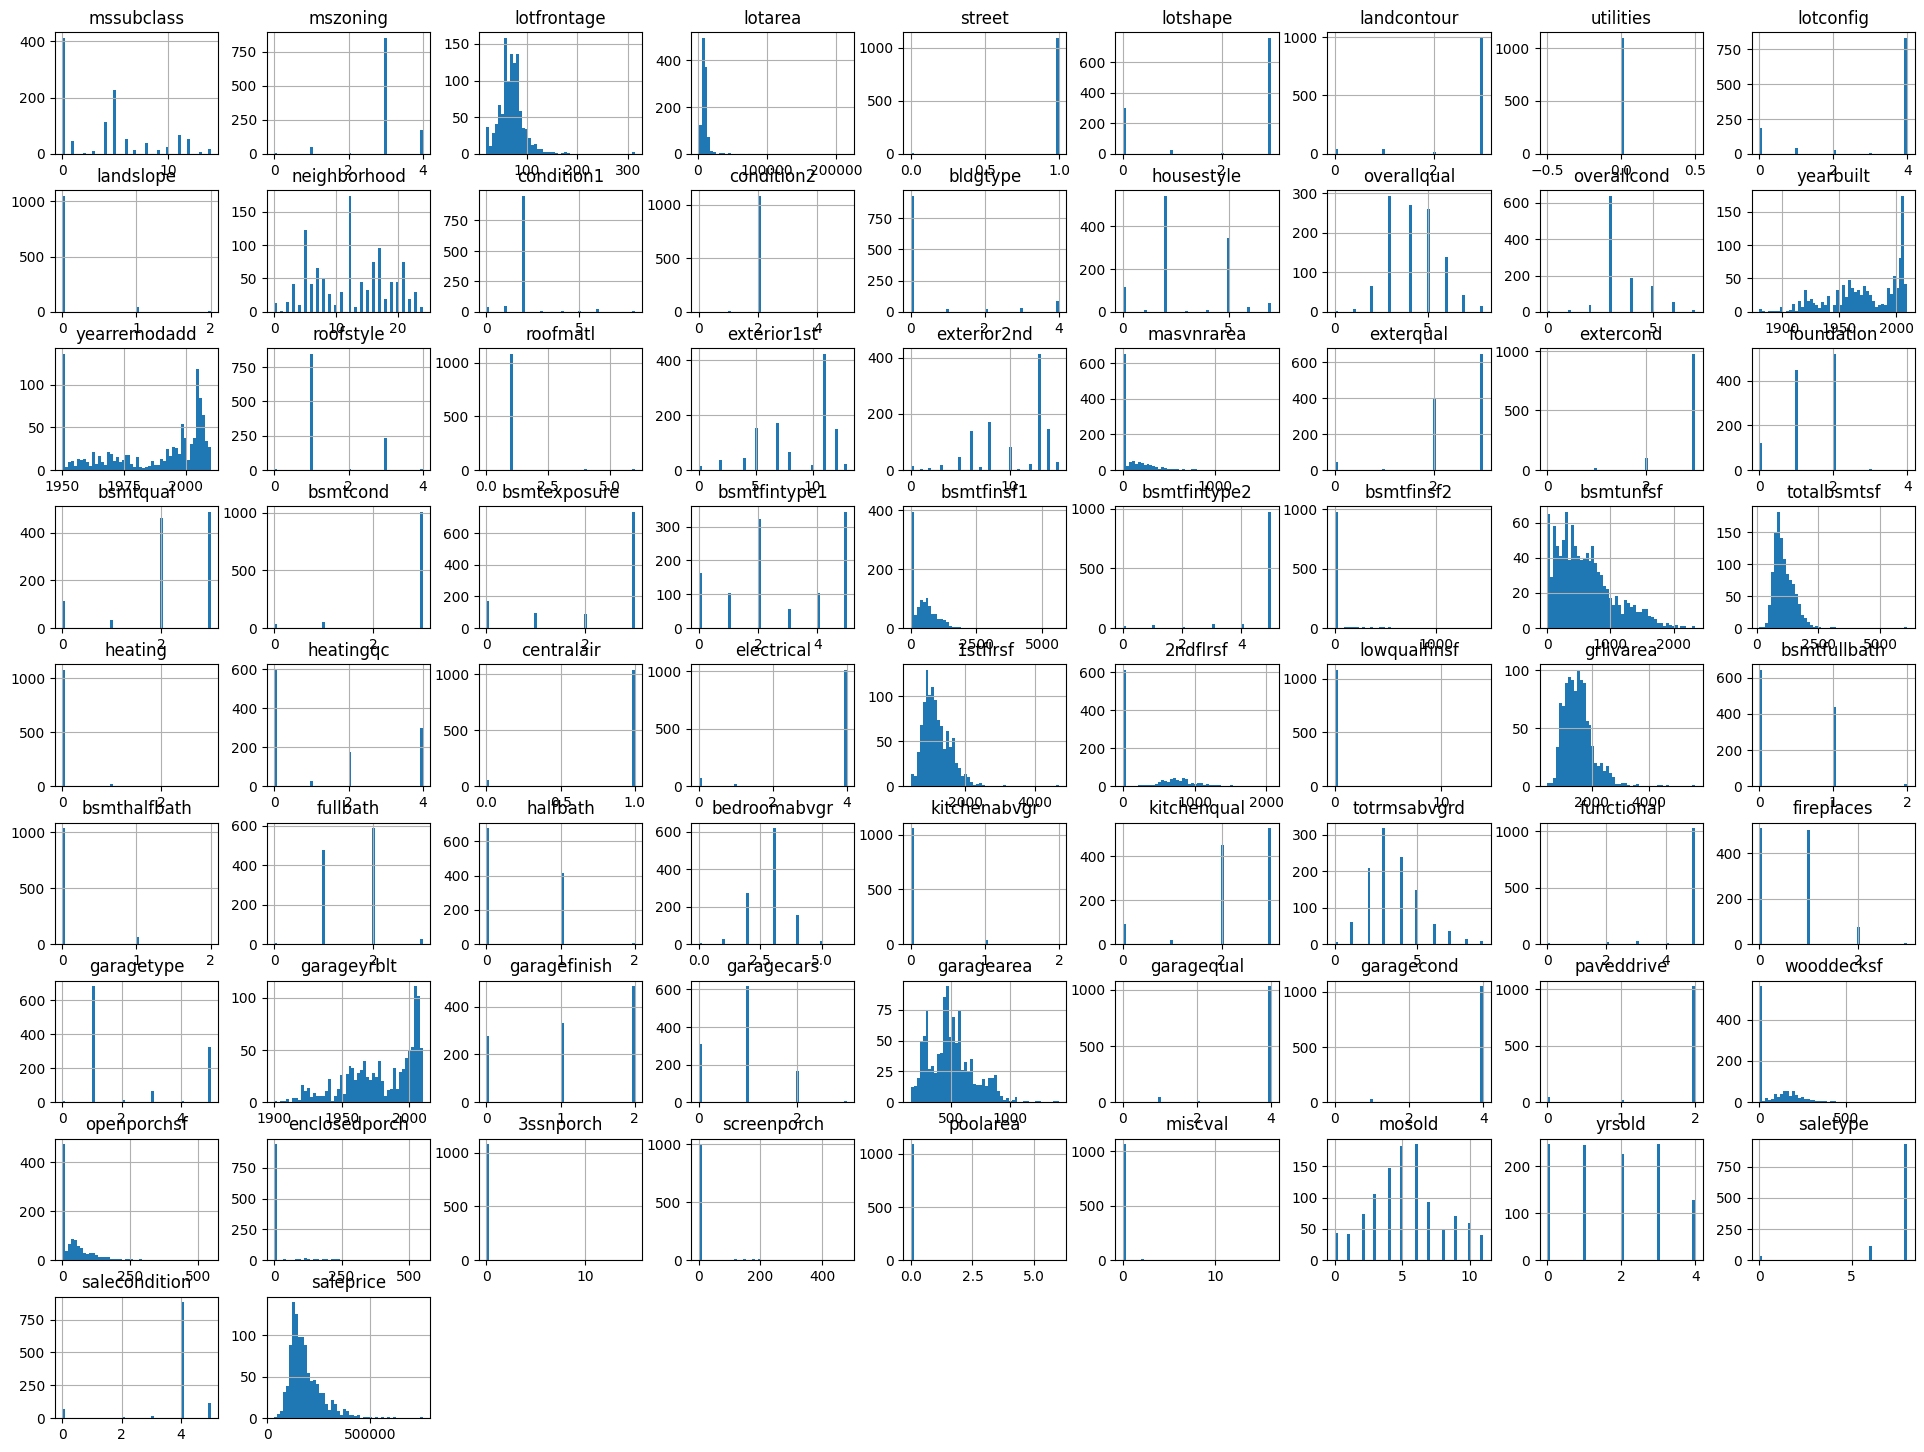

In [ ]:
df_train_label.hist(figsize = (24,18), bins = 50)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [ ]:
x = df_train_label.drop(['saleprice'], axis = 1)
y = df_train_label.saleprice

# FEATURE SELECTION

In [ ]:
sfs = SFS(RandomForestRegressor(),
          k_features=65,
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=5)

sfs.fit(x, y)


STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

SequentialFeatureSelector(estimator=RandomForestRegressor(),
                          k_features=(65, 65), scoring='accuracy')

In [ ]:
# selected_features_indices = sfs.k_feature_idx_

# selected_features = df_train_label.columns[list(selected_features_indices)]
# print(f"Selected features: {selected_features}")

# due to no proper computation power, feature selection is not applied

TypeError: 'NoneType' object is not iterable

In [ ]:
id = df_test_label.copy()
df_test_label.drop(['id'], axis = 1, inplace = True)
df_test_label = df_test_label[selected_features]

In [ ]:
print(df_train.label.shape)
print(df_test.label.shape)

In [ ]:
x = df_train_label[selected_features]

In [ ]:
x = scale.fit_transform(x)
df_test_label = scale.transform(df_test_label)

# MODEL TRAINING

In [ ]:

model_r = GradientBoostingRegressor(
    n_estimators=100,        #
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    subsample=1.0,
    max_features=None,
    random_state=42
)



In [ ]:
model_r.fit(x,y)

# EVALUATION

In [ ]:
y_pred_r = model_r.predict(df_test_label)
results_r = pd.DataFrame({'Id': id['id'], 'saleprice': y_pred_r})

results_r.to_csv('predictions_r16.csv', index=False)